In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_normalizado = min_max_scaler.fit_transform(df)
df_normalizado[0:5]

In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

In [ ]:
del df['ID']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
df_normalizado[0:5]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases
0,0.5,0.571429,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.296296
1,0.5,0.571429,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.037037
2,0.5,0.714286,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.296296
3,0.5,0.714286,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.074074
4,1.0,0.428571,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.185185


In [ ]:
df_normalizado.isna().sum()

Education            0
Marital_Status       0
Income              24
Kidhome              0
Teenhome             0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
NumWebPurchases      0
dtype: int64

In [ ]:
df_normalizado = df_normalizado.dropna()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_normalizado)
etiquetas = kmeans.labels_
print(etiquetas.shape)
np.unique(etiquetas)

(2216,)


array([0, 1], dtype=int32)

In [ ]:
df_normalizado

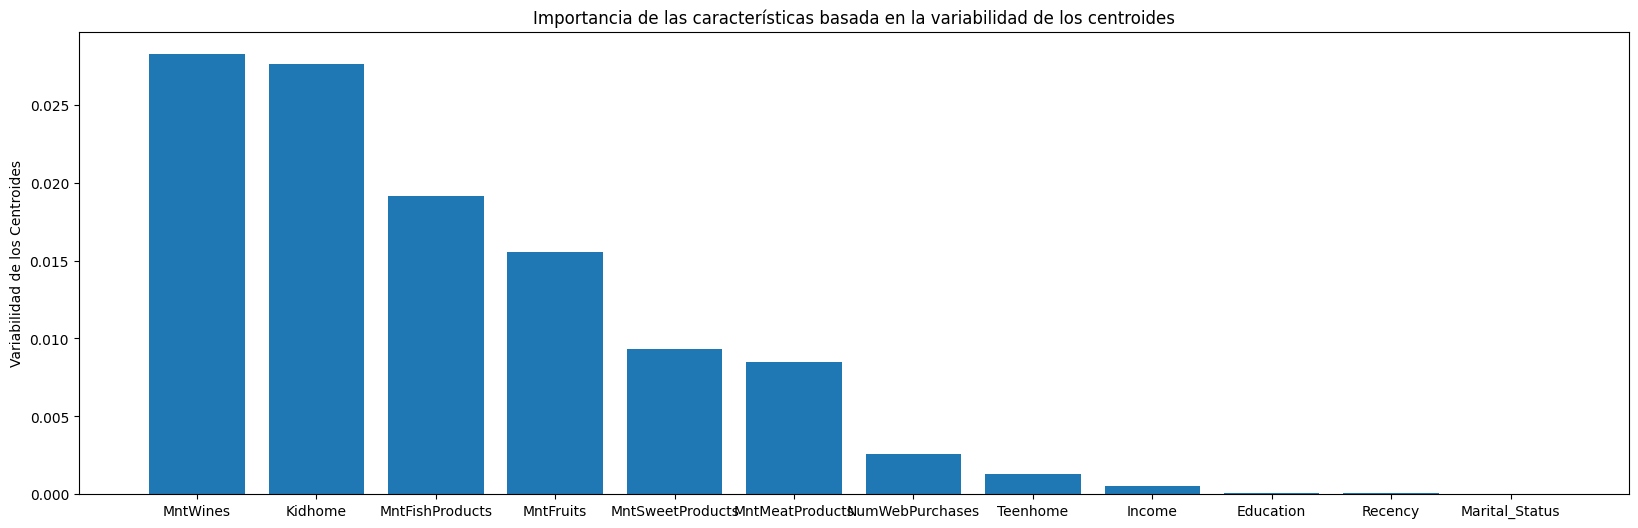

In [ ]:
# Obtener la variabilidad de las coordenadas de los centroides
centroid_variability = np.var(kmeans.cluster_centers_, axis=0)
sorted_indices = np.argsort(centroid_variability)[::-1]
plt.subplots(figsize=(20, 6))
# Gráfico de barras para visualizar la importancia de las características
plt.bar(df_normalizado.columns[sorted_indices], centroid_variability[sorted_indices])
plt.ylabel('Variabilidad de los Centroides')
plt.title('Importancia de las características basada en la variabilidad de los centroides')
plt.show()

In [ ]:
df_normalizado.columns[sorted_indices]

In [ ]:
centros

In [ ]:
feature1= list(df_normalizado.columns).index('MntWines')
feature2 = list(df_normalizado.columns).index('NumWebPurchases')

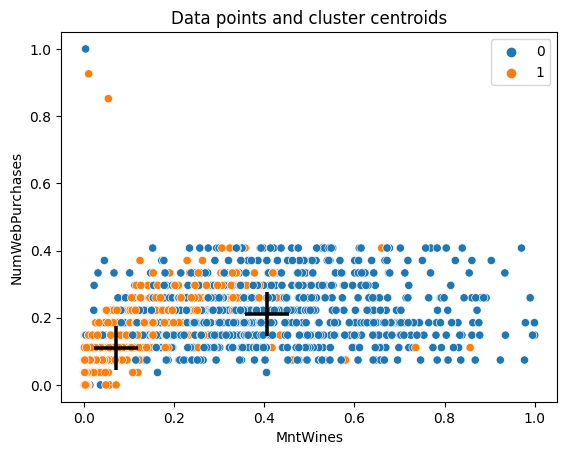

In [ ]:
centros = kmeans.cluster_centers_

sns.scatterplot(x=df_normalizado.iloc[:, feature1], y=df_normalizado.iloc[:, feature2], hue = etiquetas) # Noten que aca pasamos las etiquetas del CLUSTERING (no las originales)
sns.scatterplot(x=centros[:, feature1],y=centros[:,feature2],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

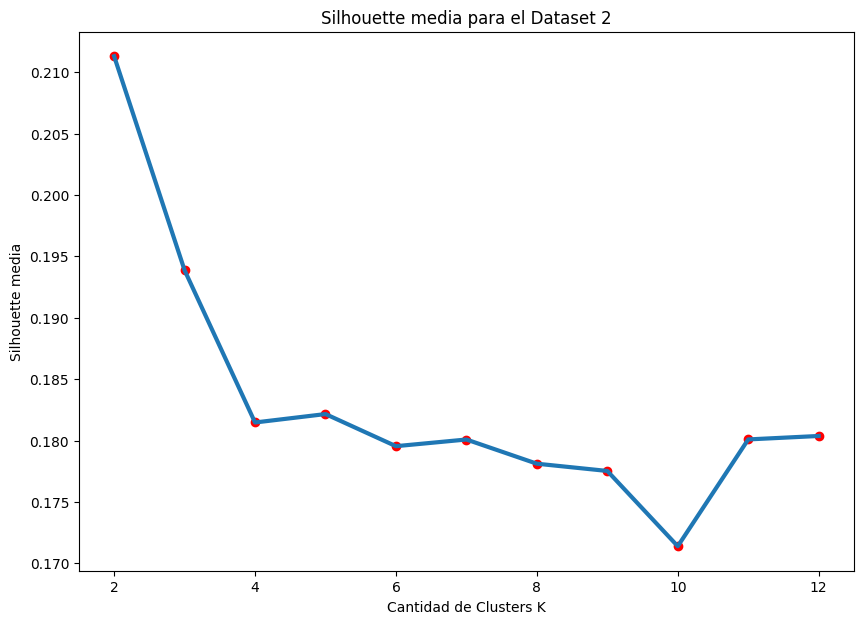

In [ ]:
K = np.arange(2,13)

lista_sil = []

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_normalizado)

    etiquetas = km.labels_

    valor_medio_sil = silhouette_score(df_normalizado, etiquetas)
    lista_sil.append(valor_medio_sil)

plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil, c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 2')

plt.show()

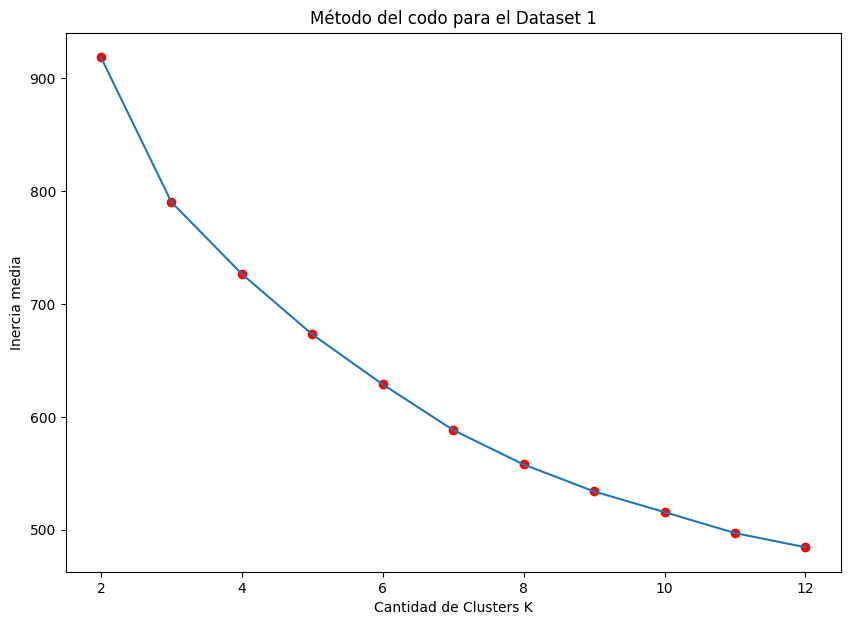

In [ ]:
lista_inercias = []

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_normalizado)
    inercia = km.inertia_
    lista_inercias.append(inercia)
plt.figure(figsize = (10,7))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()